## Machine Learning
Arthur Samuel-1929(Field of study that gives the computers the ability to learn without being explicitly programmed)

- features are inputs and labels are output. If we take apple as an example we have features like it's "size,shape,color,taste etc" and the label is the "name of the fruit"
- Supervised- we train the modal by both features and labels.
    - Regression
        - predict the continuous valued output
    - Classification
        - predict the discrete valued output
- Unsupervised--No labels are given to the learning algorithm
    - Clustering
    - Dimentionality Reduction

***Regression***
- relationship b/w independent variable and dependant variable

1. Simple Linear Regression
    - simple-one dependant variable and one independant variable
    - Linear--relationship is approximately using some straight line


### Simple Linear Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Data%20Analysis/Advertising.csv")

In [8]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
# collect X and Y
x=df['TV'].values
x.shape

(200,)

In [37]:
y=df['sales'].values

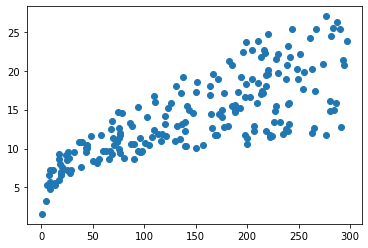

In [46]:
y.shape
plt.scatter(x,y)


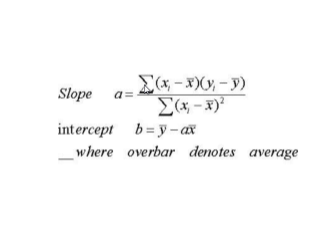

In [39]:
### Calculating the coefficient
### Mean of x and y

mean_x=np.mean(x)
print(mean_x)
mean_y=np.mean(y)
print(mean_y)

147.0425
14.0225


In [40]:
### Total no.of values
n=len(x)
n

200

In [41]:
## y=b0+b1x
## calculate the b1 and n0
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y) ##inplace of summation we use +=
    denom += (x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1)
print(b0)

0.04753664043301969
7.032593549127704


In [42]:
print("The linear equation is: y={:.4}x+{:.5}".format(b1,b0))

The linear equation is: y=0.04754x+7.0326


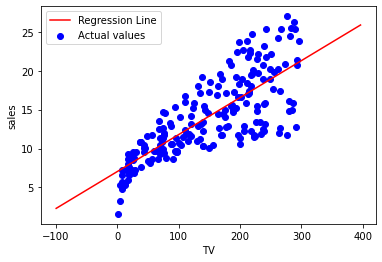

In [43]:
# plotting the values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1

plt.plot(x1,y1,color='red',label="Regression Line")
plt.scatter(x,y,c='blue',label="Actual values")
plt.xlabel("TV")
plt.ylabel("sales")
plt.legend(loc="best")
plt.show()

In [47]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [48]:
y_pred=b0+b1*x[2]
y_pred

7.8502237645756425

In [49]:
#determination coefficient(R2)---(0 to 1)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_res+=(y[i]-y_pred)**2
    ss_tot+=(y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6118750508500708


In [51]:
## Using SkLearn
from sklearn.linear_model import LinearRegression
x=df['TV'].values.reshape(-1,1)
y=df['sales'].values.reshape(-1,1)
reg=LinearRegression() #Applying the data tp the model
reg.fit(x,y)  #fit the data

LinearRegression()

In [52]:
print(reg.coef_) ##b1

[[0.04753664]]


In [54]:
print(reg.intercept_) ##b0

[7.03259355]


In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
reg.predict([[230.1]]) #predict the value for a particular input

array([[17.97077451]])

In [57]:
reg.predict([[44.5]])

array([[9.14797405]])

In [58]:
pred=reg.predict(x)
print(pred)

[[17.97077451]
 [ 9.14797405]
 [ 7.85022376]
 [14.23439457]
 [15.62721814]
 [ 7.44616232]
 [ 9.76595037]
 [12.74649773]
 [ 7.44140866]
 [16.53041431]
 [10.17476548]
 [17.23871025]
 [ 8.16396559]
 [11.66741599]
 [16.73482186]
 [16.32125309]
 [10.25557777]
 [20.40940417]
 [10.32212907]
 [14.03474068]
 [17.41459582]
 [18.31779199]
 [ 7.6600772 ]
 [17.88520856]
 [ 9.99412625]
 [19.52997632]
 [13.82557947]
 [18.44614092]
 [18.85970969]
 [10.38868036]
 [20.95607553]
 [12.39948025]
 [11.653155  ]
 [19.65832525]
 [11.58185004]
 [20.85149492]
 [19.72012288]
 [10.58358059]
 [ 9.08142275]
 [17.87094757]
 [16.65876324]
 [15.44657891]
 [20.98935118]
 [16.86792445]
 [ 8.22576322]
 [15.35625929]
 [11.2966302 ]
 [18.43663359]
 [17.83291826]
 [10.21279479]
 [16.53041431]
 [11.80527225]
 [17.31952254]
 [15.71278409]
 [19.52046899]
 [16.48763133]
 [ 7.37961102]
 [13.50708398]
 [17.05331735]
 [17.04856369]
 [ 9.57580381]
 [19.45391769]
 [18.4081116 ]
 [11.91460652]
 [13.26464711]
 [10.31262174]
 [ 8.52999

In [60]:
pred.shape

(200, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

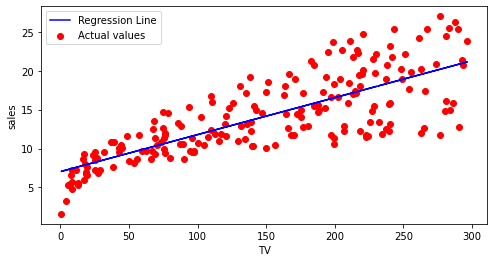

In [62]:
plt.figure(figsize=(8,4))
plt.scatter(df['TV'],df['sales'],c="red",label='Actual values')
plt.plot(df["TV"],pred,c="blue",label="Regression Line")
plt.xlabel("TV")
plt.ylabel("sales")
plt.legend(loc="best")
plt.show

In [63]:
## R2 score
r2=reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.611875050850071


In [64]:
# Take the Headbrain.csv
# Apply Linear regression
# r2,b0,b1

In [65]:
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")

In [68]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [73]:
# collect X and Y
x=data['Head Size(cm^3)'].values
x.shape

(237,)

In [75]:
y=data['Brain Weight(grams)'].values

In [76]:
### Calculating the coefficient
### Mean of x and y

mean_x=np.mean(x)
print(mean_x)
mean_y=np.mean(y)
print(mean_y)

3633.9915611814345
1282.873417721519


In [77]:
### Total no.of values
n=len(x)
n

237

In [78]:
## y=b0+b1x
## calculate the b1 and n0
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y) ##inplace of summation we use +=
    denom += (x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1)
print(b0)

0.26342933948939945
325.57342104944223


In [79]:
print("The linear equation is: y={:.4}x+{:.5}".format(b1,b0))

The linear equation is: y=0.2634x+325.57


In [88]:
data


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


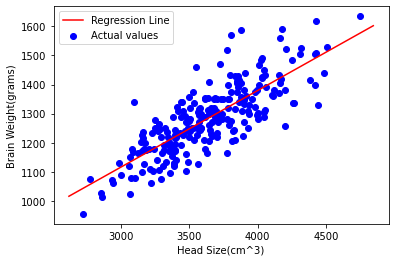

In [89]:
# plotting the values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1

plt.plot(x1,y1,color='red',label="Regression Line")
plt.scatter(x,y,c='blue',label="Actual values")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(loc="best")
plt.show()

In [81]:
y_pred=b0+b1*x[2]
y_pred

1448.0458366137732

In [82]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [83]:
#determination coefficient(R2)---(0 to 1)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_res+=(y[i]-y_pred)**2
    ss_tot+=(y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6393117199570003


In [84]:
## Using SkLearn
from sklearn.linear_model import LinearRegression
x=data['Head Size(cm^3)'].values.reshape(-1,1)
y=data['Brain Weight(grams)'].values.reshape(-1,1)
reg=LinearRegression() #Applying the data tp the model
reg.fit(x,y)  #fit the data

LinearRegression()

In [85]:
print(reg.coef_) ##b1

[[0.26342934]]


In [86]:
print(reg.intercept_) ##b0

[325.57342105]


In [87]:
pred=reg.predict(x)
print(pred)

[[1514.16660083]
 [1310.27229206]
 [1448.04583661]
 [1320.5460363 ]
 [1425.9177721 ]
 [1269.96760312]
 [1322.65347102]
 [1263.11844029]
 [1277.34362462]
 [1374.5490509 ]
 [1232.56063691]
 [1377.44677363]
 [1284.45621679]
 [1434.08408162]
 [1335.03464997]
 [1346.62554091]
 [1246.78582124]
 [1238.61951172]
 [1140.88722677]
 [1490.98481895]
 [1347.15239959]
 [1391.40852862]
 [1327.65862847]
 [1302.89627056]
 [1576.07249561]
 [1490.72138961]
 [1388.77423523]
 [1385.08622448]
 [1235.45835965]
 [1425.39091342]
 [1323.1803297 ]
 [1325.55119375]
 [1406.42400097]
 [1421.70290266]
 [1420.91261465]
 [1330.29292186]
 [1254.68870143]
 [1312.90658546]
 [1203.84683891]
 [1245.46867455]
 [1369.28046411]
 [1248.89325596]
 [1462.27102095]
 [1327.65862847]
 [1343.2009595 ]
 [1388.24737655]
 [1460.42701557]
 [1159.32728053]
 [1284.71964613]
 [1285.50993415]
 [1350.576981  ]
 [1324.76090573]
 [1450.41670067]
 [1395.88682739]
 [1382.45193108]
 [1236.512077  ]
 [1350.31355166]
 [1423.02004936]
 [1362.1678719

In [90]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


<function matplotlib.pyplot.show(close=None, block=None)>

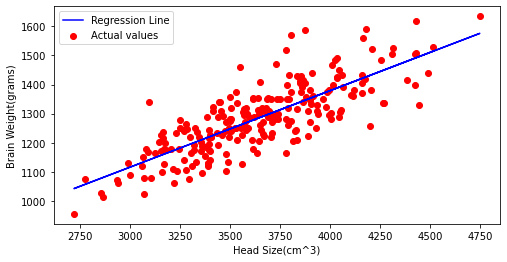

In [92]:
plt.figure(figsize=(8,4))
plt.scatter(data['Head Size(cm^3)'],data['Brain Weight(grams)'],c="red",label='Actual values')
plt.plot(data["Head Size(cm^3)"],pred,c="blue",label="Regression Line")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(loc="best")
plt.show

In [94]:
## R2 score----->lies between 0-1
r2=reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.639311719957
